<a href="https://colab.research.google.com/github/VictoriaVazquezMorales/AI_Concentration/blob/main/PyLb_ClassificationDiabetesEndtoEnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset diabetes

The dataset consist of several medical predictor variables and one target value.
Predictor variables includes:
* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [ ]:
import pandas as pd
import numpy as np

## Loading and preprocessing data

In [ ]:
from sklearn import datasets


In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
import numpy as np

In [ ]:
print(np.shape(diabetes.target))
print(np.shape(diabetes.data))

(442,)
(442, 10)


In [ ]:
diabetes.data

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23875 bytes


In [ ]:
import pandas as pd

In [ ]:
diabetes= pd.read_csv('diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notice that certain attributes have zero as minimum, replace them with the median

### Observation of balance

In [ ]:

print(diabetes['Outcome'].value_counts())


0    500
1    268
Name: Outcome, dtype: int64


In [ ]:
# The method .value_counts() return a Series object,  access data bya tupla
no_diabetic, diabetic = diabetes['Outcome'].value_counts()

In [ ]:
print('Porcentaje de personas sin diabetes: {}%'.format(no_diabetic / (no_diabetic + diabetic) * 100))
print('Porcentaje de personas con diabetes: {}%'.format(diabetic / (no_diabetic + diabetic) * 100))

Porcentaje de personas sin diabetes: 65.10416666666666%
Porcentaje de personas con diabetes: 34.89583333333333%


#Split your dataset and save the test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes,diabetes['Outcome'], test_size = 0.2, random_state=42)

In [ ]:
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.1, random_state=42)

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test = train_test_split(diabetes, test_size = 0.2, random_state=42)

In [ ]:
no_diabetic, diabetic = y_train.value_counts()

In [ ]:

print('Porcentaje de personas sin diabetes: {}%'.format(no_diabetic / (no_diabetic + diabetic) * 100))
print('Porcentaje de personas con diabetes: {}%'.format(diabetic / (no_diabetic + diabetic) * 100))

Porcentaje de personas sin diabetes: 65.30944625407166%
Porcentaje de personas con diabetes: 34.69055374592834%


# Visualizing the data

In [ ]:
#Importing Libraries
import matplotlib.pyplot as plt


Display an histogram

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

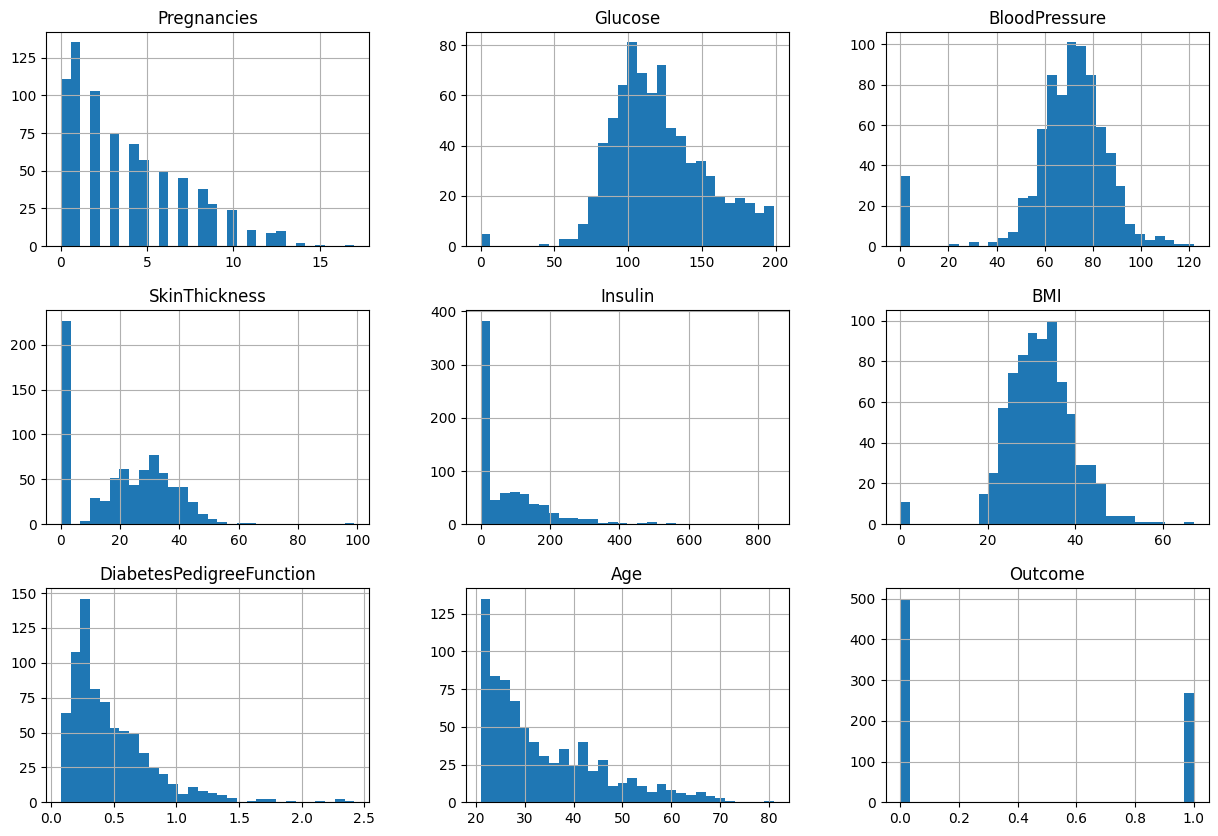

In [ ]:
diabetes.hist(bins = 30, figsize=(15,10))

Compute the correlation matrix

In [ ]:
corr_matrix = x_train.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.456117
BMI                         0.306335
Age                         0.280654
Pregnancies                 0.207550
DiabetesPedigreeFunction    0.154560
Insulin                     0.108498
BloodPressure               0.082046
SkinThickness               0.057912
Name: Outcome, dtype: float64

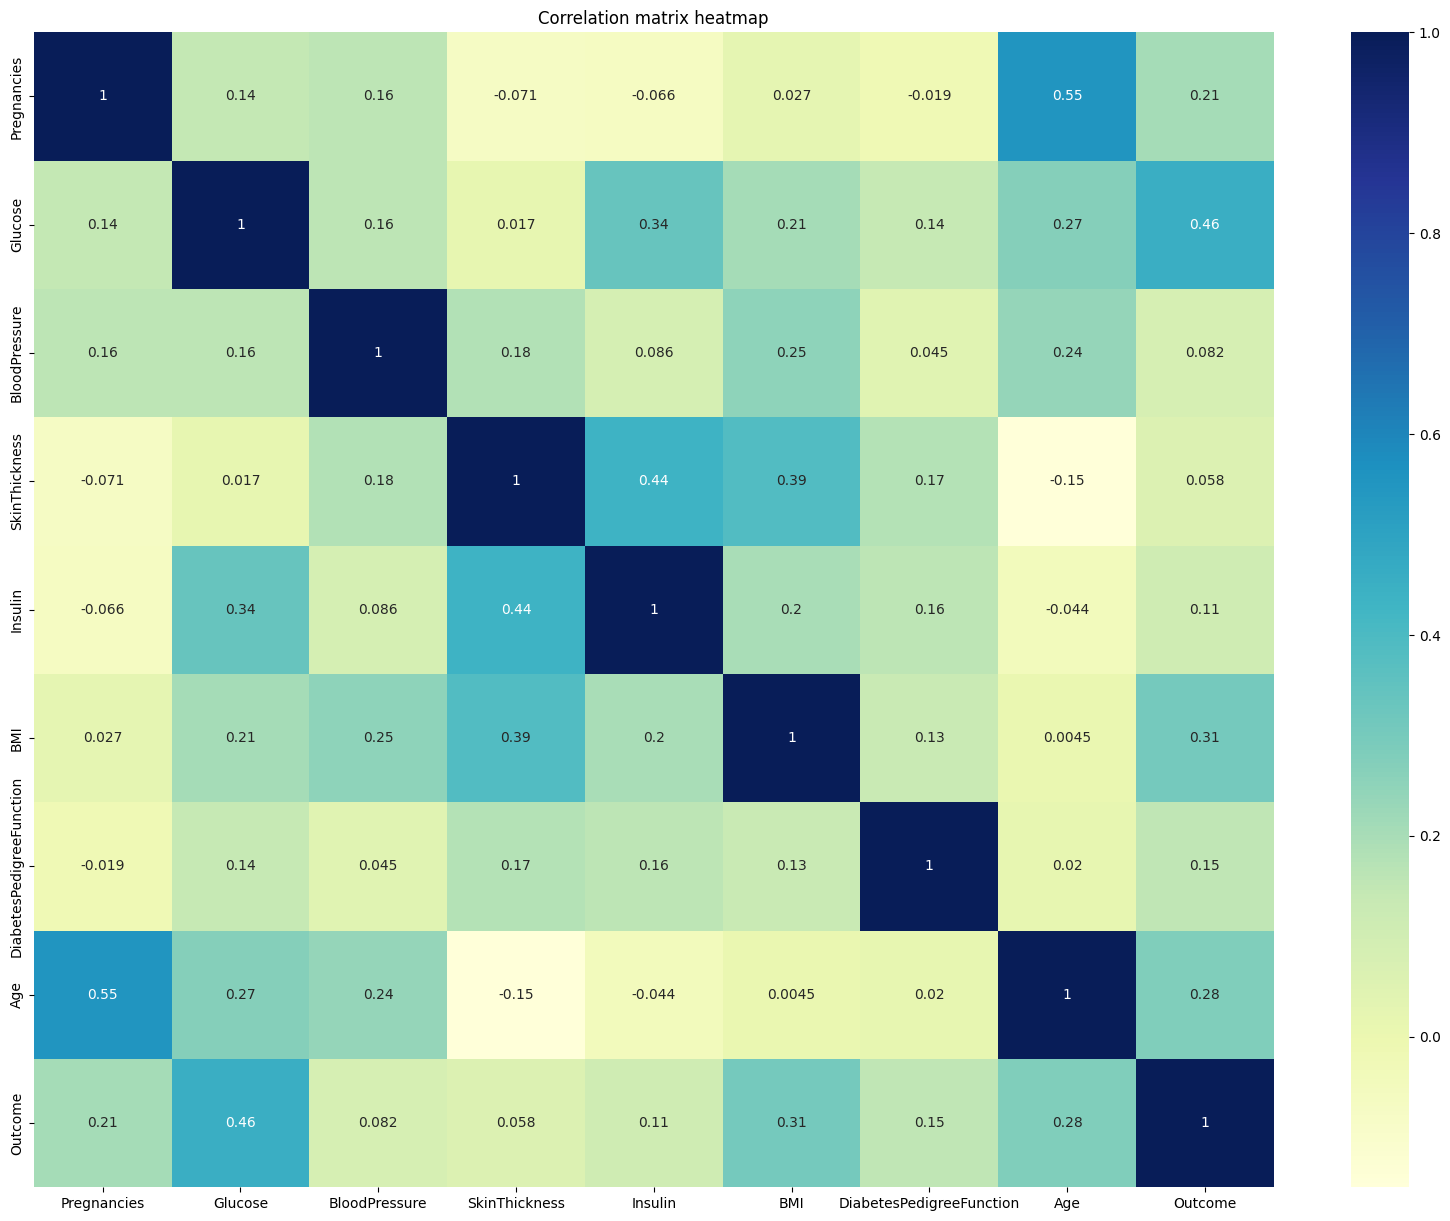

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation matrix heatmap")
plt.show()

# Create a custom transformer

In [ ]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train.drop(['Outcome'], axis=1,inplace=True)

In [ ]:
medians = x_train.median()
medians

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      42.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [ ]:
x_train['Glucose'] = x_train['Glucose'].replace(0,medians['Glucose'])
x_train['BloodPressure'] = x_train['BloodPressure'].replace(0,medians['BloodPressure'])
x_train['SkinThickness'] = x_train['SkinThickness'].replace(0,medians['SkinThickness'])
x_train['Insulin'] = x_train['Insulin'].replace(0,medians['Insulin'])
x_train['BMI'] = x_train['BMI'].replace(0,medians['BMI'])

In [ ]:
x_train.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,121.807818,72.229642,26.991857,101.511401,32.348208,0.469168,32.907166
std,3.313264,30.105181,12.099278,8.782951,103.376274,6.935618,0.336847,11.503437
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,23.000000,42.500000,27.325000,0.241500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,42.750000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
sc = MinMaxScaler()

In [ ]:
x_train = sc.fit_transform(x_train)

In [ ]:
x_train

array([[0.11764706, 0.25806452, 0.48979592, ..., 0.28220859, 0.09649872,
        0.        ],
       [0.52941176, 0.43870968, 0.59183673, ..., 0.20449898, 0.51409052,
        0.48333333],
       [0.05882353, 0.61290323, 0.2244898 , ..., 0.21472393, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.36774194, 0.63265306, ..., 0.5603272 , 0.45175064,
        0.28333333],
       [0.        , 0.62580645, 0.48979592, ..., 0.49488753, 0.05422716,
        0.13333333],
       [0.        , 0.52258065, 0.73469388, ..., 0.08793456, 0.07856533,
        0.        ]])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size = 0.1, random_state=42)

### KNeigborsClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn = knn.fit(x_train, y_train)

In [ ]:
y_train_pred = knn.predict(x_train)
y_val_pred = knn.predict(x_val)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
train_cm = confusion_matrix(y_train, y_train_pred)

In [ ]:
val_cm = confusion_matrix(y_val, y_val_pred)

In [ ]:
print('La matriz de confusión de entrenamiento es: {}'.format(train_cm))
print('La matriz de confusión de validación es: {}'.format(val_cm))

La matriz de confusión de entrenamiento es: [[320  39]
 [ 60 133]]
La matriz de confusión de validación es: [[34  8]
 [ 9 11]]


In [ ]:
pd.crosstab(y_train, y_train_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,320,39,359
1,60,133,193
All,380,172,552


In [ ]:
pd.crosstab(y_val, y_val_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,34,8,42
1,9,11,20
All,43,19,62


In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)

# Cálculo de la exactitud para el conjunto de validación
val_accuracy = accuracy_score(y_val, y_val_pred)

print('The accuracy con train set: {}'.format(train_accuracy))
print('The accuracy con train set: {}'.format(val_accuracy))

The accuracy con train set: 0.8206521739130435
The accuracy con train set: 0.7258064516129032


In [ ]:
from sklearn.metrics import classification_report

print('---------------- Classification Report ----------------')
print(classification_report(y_train, y_train_pred))

print('----------------- Validation Report ------------------')
# Cálculo e impresión del reporte para el conjunto de validación.
print(classification_report(y_val, y_val_pred))

---------------- Classification Report ----------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       359
           1       0.77      0.69      0.73       193

    accuracy                           0.82       552
   macro avg       0.81      0.79      0.80       552
weighted avg       0.82      0.82      0.82       552

----------------- Validation Report ------------------
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.58      0.55      0.56        20

    accuracy                           0.73        62
   macro avg       0.68      0.68      0.68        62
weighted avg       0.72      0.73      0.72        62



### Cross validation

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    # Para el parámetro n_neighbors se probarán todos los valores del 1 al 34
    'n_neighbors': np.arange(1, 35)
}


In [ ]:
knn_gs = GridSearchCV(
            # El modelo sobre el cuál se probarán los parámetros.
            KNeighborsClassifier(),
            # Los parámetros que se probarán (diccionario).
            param_grid,
            # Al final se reajustará el modelo con todos los datos disponibles.
            refit=True,
            # Nivel de resumen mostrado al hacer la búsqueda.
            verbose=3
        )

In [ ]:
knn_gs = knn_gs.fit(x_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.721 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.631 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.700 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.636 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.718 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.721 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.649 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.736 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.700 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.682 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.730 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

In [ ]:
print('Best parameters: {}'.format(knn_gs.best_params_))

Best parameters: {'n_neighbors': 9}


In [ ]:
knn_gs.predict(x_val[0:10])

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_val[0:10]

370    1
53     1
644    0
71     0
675    1
681    1
45     1
346    0
437    0
334    0
Name: Outcome, dtype: int64

In [ ]:
print('The results include the values : {}'.format(knn_gs.cv_results_.keys()))

The results include the values : dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


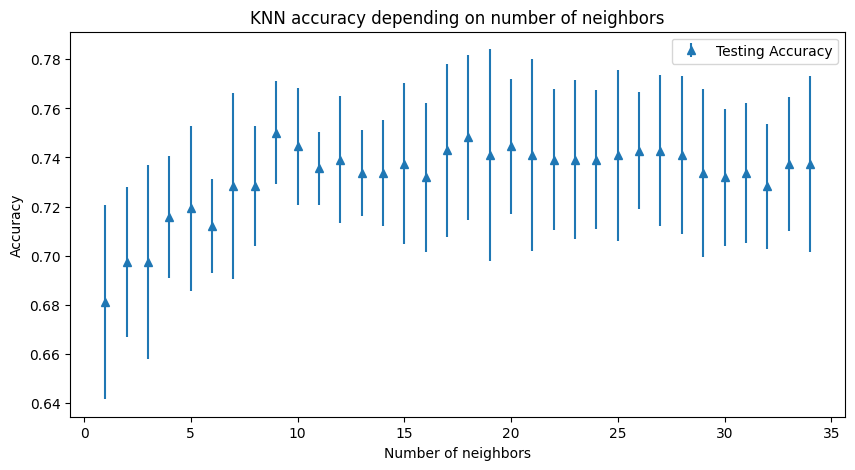

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5))

x_ = np.arange(1, 35)
y_ = knn_gs.cv_results_['mean_test_score']
e_ = knn_gs.cv_results_['std_test_score']

ax.errorbar(x_, y_, e_, linestyle='None', marker='^', label = 'Testing Accuracy')

ax.set_title('KNN accuracy depending on number of neighbors')
ax.legend()
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')

plt.show()

#Prepare test dataset

In [ ]:
x_test.drop(['Outcome'], axis=1,inplace=True)

In [ ]:
x_test['Glucose'] = x_test['Glucose'].replace(0,medians['Glucose'])
x_test['BloodPressure'] = x_test['BloodPressure'].replace(0,medians['BloodPressure'])
x_test['SkinThickness'] = x_test['SkinThickness'].replace(0,medians['SkinThickness'])
x_test['Insulin'] = x_test['Insulin'].replace(0,medians['Insulin'])
x_test['BMI'] = x_test['BMI'].replace(0,medians['BMI'])

In [ ]:
x_test = sc.transform(x_test)

In [ ]:
y_val_gs_pred = knn_gs.predict(x_val)

In [ ]:
val_gs_accuracy = accuracy_score(y_val, y_val_gs_pred)

In [ ]:
print(('The accuracy of model with {} neighbors was {:.3f} for test set').format(
        knn_gs.best_estimator_.n_neighbors,
        val_gs_accuracy
       ))

The accuracy of model with 9 neighbors was 0.758 for test set


# Model exploration

lets try with all these models:
* KNN
* Tree decisions
* Naive Bayes
* SVM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
models = [
    # Clasifier KNN
    KNeighborsClassifier(),
    # Tree Decision
    DecisionTreeClassifier(random_state=42),
    # Naive Bayes
    MultinomialNB(),
    # SVM
    SVC(random_state=42)
]

In [ ]:
parameters = [
    # Parametros para KNN
    {
        # Para el parámetro n_neighbors se probarán todos los valores del 1 al 35
        'n_neighbors': np.arange(1, 36)
    },
    # Parametros para árboles de decisión
    {
        # Para el parámetro max_depth se probarán todos los valores del 1 al 20
        'max_depth': np.arange(1, 21)
    },
    # Parametros para Naive Bayes
    {
        # Para el parámetro alpha se probarán todos los valores del 0 al 1 yendo en pasos de .1
        'alpha': np.arange(0.1, 1.1, .1)
    },
    # Parametros para SVMs
    {
        # Para el parámetro degree se probarán todos los valores del 1 al 5
        'degree': np.arange(1, 6)
    }
]

In [ ]:
y_val.shape

(62,)

In [ ]:
for model, param_grid in zip(models, parameters):
    print('\n-------- Evaluando {} --------'.format(type(model)))
    # Se realiza la exploración de parámetros para cada modelo
    model_gs = GridSearchCV(
                # El modelo sobre el cuál se probarán los parámetros.
                model,
                # Los parámetros que se probarán (diccionario).
                param_grid,
                # Al final se reajustará el modelo con todos los datos disponibles.
                refit=True,
                # Nivel de resumen mostrado al hacer la búsqueda.
                verbose=0,
                scoring='accuracy'
            )

    # Se ajusta el modelo utilizando la exploración de parámetros
    model_gs.fit(x_train, y_train)

    print('Lo parámetros seleccionados son {}'.format(model_gs.best_params_))

    best_model_index = np.argmin(model_gs.cv_results_['rank_test_score'])

    print('La exactitud en el conjunto de entrenamiento, utilizando CV es {:.3f}'.format(
        model_gs.cv_results_['mean_test_score'][best_model_index]
    ))

    print('La exactitud en el conjunto de prueba es {:.3f}'.format(
        accuracy_score(y_val, model_gs.best_estimator_.predict(x_val))
    ))


-------- Evaluando <class 'sklearn.neighbors._classification.KNeighborsClassifier'> --------
Lo parámetros seleccionados son {'n_neighbors': 9}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.750
La exactitud en el conjunto de prueba es 0.758

-------- Evaluando <class 'sklearn.tree._classes.DecisionTreeClassifier'> --------
Lo parámetros seleccionados son {'max_depth': 4}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.730
La exactitud en el conjunto de prueba es 0.742

-------- Evaluando <class 'sklearn.naive_bayes.MultinomialNB'> --------
Lo parámetros seleccionados son {'alpha': 0.1}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.650
La exactitud en el conjunto de prueba es 0.677

-------- Evaluando <class 'sklearn.svm._classes.SVC'> --------
Lo parámetros seleccionados son {'degree': 1}
La exactitud en el conjunto de entrenamiento, utilizando CV es 0.752
La exactitud en el conjunto de prueba es 0.790


In [ ]:
model_gs

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'degree': array([1, 2, 3, 4, 5])}, scoring='accuracy')

# Now train with the best model in validation set

In [ ]:
x_train_c = np.concatenate([x_train,x_val],axis=0)

In [ ]:
x_train_c.shape

(614, 8)

In [ ]:
y_train_c = np.concatenate([y_train,y_val])

In [ ]:
y_train_c.shape

(614,)

In [ ]:
from sklearn import svm
svm = SVC(random_state=42,degree=1)
model = svm.fit(x_train_c,y_train_c)


In [ ]:
x_test

array([[0.35294118, 0.3483871 , 0.34693878, ..., 0.32310838, 0.15029889,
        0.36666667],
       [0.11764706, 0.43870968, 0.52040816, ..., 0.35787321, 0.02988898,
        0.        ],
       [0.11764706, 0.41290323, 0.40816327, ..., 0.25766871, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.32903226, 0.48979592, ..., 0.3803681 , 0.17378309,
        0.6       ],
       [0.11764706, 0.65806452, 0.46938776, ..., 0.200409  , 0.11058924,
        0.13333333],
       [0.47058824, 0.19354839, 0.46938776, ..., 0.34969325, 0.2677199 ,
        0.3       ]])

In [ ]:
y_test_pred=model.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
test_accuracy

0.7597402597402597

#Forest Random Tree

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Grid of parameters

#define a set of parameters

param_grid = []

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_cls = RandomForestClassifier( criterion='entropy')
grid_search = GridSearchCV #(Complete your code here...)

In [ ]:
grid_search.fit # fit the data

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid=[{'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                          'min_samples_split': [2, 5, 10],
                          'n_estimators': [50, 100, 200]}],
             scoring='accuracy')

In [ ]:
#print("Grid mejores parámetros: ",grid_search.best_params_)
print("Grid mejor estimador: ",grid_search.best_estimator_)

Grid mejor estimador:  RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=50)


In [ ]:
cvres = grid_search.cv_results_

In [ ]:
cvres = grid_search.cv_results_
print("Resultados de Grid search")
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

NameError: ignored

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
#y_test = x_test['Outcome'].copy()

In [ ]:
y_pred_tr = final_model.predict(x_test)

In [ ]:
y_pred_tr

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# Confusion Matrix and Accuracy Score
cm_3 = confusion_matrix(y_test, y_pred_tr)
a_3 = accuracy_score(y_test, y_pred_tr)

In [ ]:
print('Confusion Matrix for Random Forest :\n', cm_3)
print('Accuracy Score for Random Forest :\n', a_3)

Confusion Matrix for Random Forest :
 [[82 17]
 [17 38]]
Accuracy Score for Random Forest :
 0.7792207792207793


In [ ]:
#Improve the accuracy

In [ ]:
pd.crosstab(y_test, y_pred_tr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,82,17,99
1,17,38,55
All,99,55,154


#Can you improve that percentage?

Try it!

Ejercicio

Try to make a pipeline, replacing the zero values by mean or median, and then use the minmax scaler.

Try other set of hyperparameters in the grid search.
